In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests, bs4

In [76]:
# Educational Level By Age And Sex For Population Age 7 And Above - 2011 (Census in India is a massive data)
edu_cens_2011_orginal = pd.read_excel("./Data/DDW-0000C-08.xlsx")
edu_cens_2011_orginal

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,C-8 EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,Table,State,Distt.,Area Name,Total/,Age-group,Total,NaN,NaN,Illiterate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name,Code,Code,NaN,Rural/,NaN,NaN,NaN,NaN,NaN,...,NaN,Technical diploma or certificate,NaN,NaN,Graduate & above,NaN,NaN,Unclassified,NaN,NaN
2,NaN,NaN,NaN,NaN,Urban/,NaN,NaN,NaN,NaN,NaN,...,NaN,not equal to degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Persons,Males,Females,Persons,...,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
4,NaN,NaN,NaN,NaN,NaN,1,2,3,4,5,...,31,32,33,34,35,36,37,38,39,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,C2308,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,65-69,1757,953,804,586,...,0,21,14,7,82,72,10,4,1,3
3134,C2308,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,70-74,1193,691,502,419,...,4,14,9,5,56,41,15,7,4,3
3135,C2308,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,75-79,645,343,302,234,...,0,6,3,3,22,16,6,7,4,3
3136,C2308,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,80+,616,287,329,264,...,0,2,1,1,23,14,9,6,1,5


In [77]:
# find the rows which have all values blank note:- use all function instead of == num_columns
edu_cens_2011_orginal[edu_cens_2011_orginal.isnull().sum(axis=1) == 45]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,C-8 EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# get the boolean series to display whehter a row has all values blank or not
edu_cens_2011_orginal.isnull().all(axis=1)

# get the rows having all values blank
edu_cens_2011_orginal[edu_cens_2011_orginal.isnull().all(axis=1)]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,C-8 EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
marks = pd.read_csv('https://query.data.world/s/HqjNNadqEnwSq1qnoV_JqyRJkc7o6O')
marks.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89


In [80]:
marks.isnull().sum()

Prefix         0
Assignment     2
Tutorial      12
Midterm       16
TakeHome       9
Final          5
dtype: int64

In [81]:
marks[marks.isnull().sum(axis=1) > 4]

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
73,7,NaN,NaN,NaN,NaN,NaN
90,8,NaN,NaN,NaN,NaN,NaN


In [82]:
edu_cens_2011_orginal.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'C-8  EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [83]:
edu_cens_2011_orginal = edu_cens_2011_orginal.iloc[3: , 1:]
edu_cens_2011_orginal.rename(columns = {'Unnamed: 0': 'Table', 'Unnamed: 1': 'State Code', 'Unnamed: 2': 'District Code', 
                                        'Unnamed: 3': 'Area Name', 'Unnamed: 4': 'Total/Rural/Urban', 'C-8  EDUCATIONAL LEVEL BY AGE AND SEX FOR POPULATION AGE 7 AND ABOVE - 2011': 'Age Group',
                                        'Unnamed: 6': 'Total Persons','Unnamed: 7': 'Total Males', 'Unnamed: 8': 'Total Females',
                                        'Unnamed: 9': 'Illiterate Persons','Unnamed: 10': 'Illiterate Males', 'Unnamed: 11': 'Illiterate Females',
                                        'Unnamed: 12': 'Literate Persons','Unnamed: 13': 'Literate Males', 'Unnamed: 14': 'Literate Females'}, inplace=True)
edu_cens_2011_orginal

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
3,NaN,NaN,NaN,NaN,NaN,Persons,Males,Females,Persons,Males,...,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
4,NaN,NaN,NaN,NaN,1,2,3,4,5,6,...,31,32,33,34,35,36,37,38,39,40
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
7,00,000,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,65-69,1757,953,804,586,195,...,0,21,14,7,82,72,10,4,1,3
3134,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,70-74,1193,691,502,419,140,...,4,14,9,5,56,41,15,7,4,3
3135,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,75-79,645,343,302,234,80,...,0,6,3,3,22,16,6,7,4,3
3136,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,80+,616,287,329,264,68,...,0,2,1,1,23,14,9,6,1,5


In [84]:
fc_state_and_district_isnull = (edu_cens_2011_orginal['State Code'].isnull()) & (edu_cens_2011_orginal['District Code'].isnull())
# Ignonre rows having blank state/distrect code
edu_cens_2011_orginal = edu_cens_2011_orginal[~fc_state_and_district_isnull]
edu_cens_2011_orginal

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
6,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
7,00,000,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,...,0,0,0,0,0,0,0,0,0,0
8,00,000,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,...,0,0,0,0,0,0,0,136465,75715,60750
9,00,000,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,...,0,0,0,0,0,0,0,96524,52561,43963
10,00,000,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,...,0,0,0,0,0,0,0,70452,38456,31996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,65-69,1757,953,804,586,195,...,0,21,14,7,82,72,10,4,1,3
3134,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,70-74,1193,691,502,419,140,...,4,14,9,5,56,41,15,7,4,3
3135,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,75-79,645,343,302,234,80,...,0,6,3,3,22,16,6,7,4,3
3136,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,80+,616,287,329,264,68,...,0,2,1,1,23,14,9,6,1,5


In [85]:
edu_cens_2011_orginal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 6 to 3137
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State Code          3132 non-null   object
 1   District Code       3132 non-null   object
 2   Area Name           3132 non-null   object
 3   Total/Rural/Urban   3132 non-null   object
 4   Age Group           3132 non-null   object
 5   Total Persons       3132 non-null   object
 6   Total Males         3132 non-null   object
 7   Total Females       3132 non-null   object
 8   Illiterate Persons  3132 non-null   object
 9   Illiterate Males    3132 non-null   object
 10  Illiterate Females  3132 non-null   object
 11  Literate Persons    3132 non-null   object
 12  Literate Males      3132 non-null   object
 13  Literate Females    3132 non-null   object
 14  Unnamed: 15         3132 non-null   object
 15  Unnamed: 16         3132 non-null   object
 16  Unnamed: 17         3132

In [86]:
fc_area_name_india_with_total = (edu_cens_2011_orginal['Area Name'] == 'INDIA') & (edu_cens_2011_orginal['Total/Rural/Urban'] == 'Total')
fc_area_name_india_with_total.sum()
edu_cens_2011_total_india_population = edu_cens_2011_orginal[fc_area_name_india_with_total]
edu_cens_2011_total_india_population

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
6,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
7,00,000,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,...,0,0,0,0,0,0,0,0,0,0
8,00,000,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,...,0,0,0,0,0,0,0,136465,75715,60750
9,00,000,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,...,0,0,0,0,0,0,0,96524,52561,43963
10,00,000,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,...,0,0,0,0,0,0,0,70452,38456,31996
11,00,000,INDIA,Total,10,30552107,16089436,14462671,3454505,1661124,...,0,0,0,0,0,0,0,85652,47423,38229
12,00,000,INDIA,Total,11,24740946,12962604,11778342,1988473,929328,...,0,0,0,0,0,0,0,65030,35877,29153
13,00,000,INDIA,Total,12,27877307,14637892,13239415,2391529,1087320,...,0,0,0,0,0,0,0,68452,37773,30679
14,00,000,INDIA,Total,13,24280683,12563775,11716908,1810476,790923,...,0,0,0,0,0,0,0,56720,30680,26040
15,00,000,INDIA,Total,14,25258169,13165128,12093041,2100785,920460,...,0,0,0,0,0,0,0,58561,31901,26660


In [87]:
edu_cens_2011_total_india_population.describe()

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
count,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
unique,1,1,1,1,29,29,29,29,29,29,...,18,18,18,18,16,16,16,29,29,29
top,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,...,0,0,0,0,0,0,0,3031570,1647116,1384454
freq,29,29,29,29,1,1,1,1,1,1,...,12,12,12,12,14,14,14,1,1,1


In [88]:
edu_cens_2011_total_india_population.isnull().sum()

State Code            0
District Code         0
Area Name             0
Total/Rural/Urban     0
Age Group             0
Total Persons         0
Total Males           0
Total Females         0
Illiterate Persons    0
Illiterate Males      0
Illiterate Females    0
Literate Persons      0
Literate Males        0
Literate Females      0
Unnamed: 15           0
Unnamed: 16           0
Unnamed: 17           0
Unnamed: 18           0
Unnamed: 19           0
Unnamed: 20           0
Unnamed: 21           0
Unnamed: 22           0
Unnamed: 23           0
Unnamed: 24           0
Unnamed: 25           0
Unnamed: 26           0
Unnamed: 27           0
Unnamed: 28           0
Unnamed: 29           0
Unnamed: 30           0
Unnamed: 31           0
Unnamed: 32           0
Unnamed: 33           0
Unnamed: 34           0
Unnamed: 35           0
Unnamed: 36           0
Unnamed: 37           0
Unnamed: 38           0
Unnamed: 39           0
Unnamed: 40           0
Unnamed: 41           0
Unnamed: 42     

In [89]:
edu_cens_2011_total_india_population

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
6,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
7,00,000,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,...,0,0,0,0,0,0,0,0,0,0
8,00,000,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,...,0,0,0,0,0,0,0,136465,75715,60750
9,00,000,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,...,0,0,0,0,0,0,0,96524,52561,43963
10,00,000,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,...,0,0,0,0,0,0,0,70452,38456,31996
11,00,000,INDIA,Total,10,30552107,16089436,14462671,3454505,1661124,...,0,0,0,0,0,0,0,85652,47423,38229
12,00,000,INDIA,Total,11,24740946,12962604,11778342,1988473,929328,...,0,0,0,0,0,0,0,65030,35877,29153
13,00,000,INDIA,Total,12,27877307,14637892,13239415,2391529,1087320,...,0,0,0,0,0,0,0,68452,37773,30679
14,00,000,INDIA,Total,13,24280683,12563775,11716908,1810476,790923,...,0,0,0,0,0,0,0,56720,30680,26040
15,00,000,INDIA,Total,14,25258169,13165128,12093041,2100785,920460,...,0,0,0,0,0,0,0,58561,31901,26660


In [90]:
# Q1. What percentage of females in the age group 20-24 are illiterate in India, i.e. out of all the 
# females in the age group 20-24, what fraction is illiterate?
age_grp = '20-24'
area_name='INDIA'
total_or_rural_or_urban = 'Total'
edu_cens_2011_india_orginal_from_20_to_24 =edu_cens_2011_orginal[(edu_cens_2011_orginal['Age Group'] == age_grp) 
                                                           & (edu_cens_2011_orginal['Area Name'] == area_name)
                                                          & (edu_cens_2011_orginal['Total/Rural/Urban'] == total_or_rural_or_urban)]
edu_cens_2011_india_orginal_from_20_to_24.iloc[:, 0:15]

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,Illiterate Females,Literate Persons,Literate Males,Literate Females,Unnamed: 15
21,00,000,INDIA,Total,20-24,111424222,57584693,53839529,18679492,6467026,12212466,92744730,51117667,41627063,4147405


In [91]:
# formula will be used
# (total_illitrate_females_from_age_20_to_24/total_females_from_20_to_24)*100

total_illitrate_females_from_age_20_to_24 =  edu_cens_2011_india_orginal_from_20_to_24['Illiterate Females']
print("total_illitrate_females_from_age_20_to_24:  {}".format(total_illitrate_females_from_age_20_to_24))


total_females_from_20_to_24 = edu_cens_2011_india_orginal_from_20_to_24['Total Females']
print("total_females_from_20_to_24:  {}".format(total_females_from_20_to_24))

(total_illitrate_females_from_age_20_to_24/total_females_from_20_to_24)*100

per_of_females_from_20_to_24_illiterate_in_india = (total_illitrate_females_from_age_20_to_24/total_females_from_20_to_24)*100

print("per_of_females_from_20_to_24_illiterate_in_india: {}".format(per_of_females_from_20_to_24_illiterate_in_india))


total_illitrate_females_from_age_20_to_24:  21    12212466
Name: Illiterate Females, dtype: object
total_females_from_20_to_24:  21    53839529
Name: Total Females, dtype: object
per_of_females_from_20_to_24_illiterate_in_india: 21    22.683085
dtype: object


In [92]:
#Q2.  Compare the literacy rates (i.e. the number of literates / total number of population) in each age group
# and choose the correct option.

area_name='INDIA'
total_or_rural_or_urban = 'Total'
literate_Persons = "Literate Persons"
edu_cens_2011_india_orginal = edu_cens_2011_orginal[(edu_cens_2011_orginal['Area Name'] == area_name)
                                                   & (edu_cens_2011_orginal['Total/Rural/Urban'] == total_or_rural_or_urban)]

edu_cens_2011_india_orginal['Litracy Rate for Persons'] = (edu_cens_2011_india_orginal['Literate Persons']
                                                            /edu_cens_2011_india_orginal['Total Persons'])* 100

edu_cens_2011_india_orginal.loc[:, ['Age Group','Litracy Rate for Persons']].sort_values(by='Litracy Rate for Persons',
                                                                                         ascending=False)

C:\Users\window 10\AppData\Local\Temp\ipykernel_12208\1135360687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_cens_2011_india_orginal['Litracy Rate for Persons'] = (edu_cens_2011_india_orginal['Literate Persons']


,Age Group,Litracy Rate for Persons
14,13,92.543554
12,11,91.962826
15,14,91.68275
13,12,91.421234
18,17,90.392562
16,15,89.961344
17,16,89.783437
10,9,89.362038
11,10,88.693071
20,19,87.637647


In [93]:
edu_cens_2011_orginal.iloc[:, :15]

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,Illiterate Females,Literate Persons,Literate Males,Literate Females,Unnamed: 15
6,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190,35153231
7,00,000,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0,0
8,00,000,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745,424205
9,00,000,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764,351280
10,00,000,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088,291281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,65-69,1757,953,804,586,195,391,1171,758,413,56
3134,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,70-74,1193,691,502,419,140,279,774,551,223,37
3135,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,75-79,645,343,302,234,80,154,411,263,148,21
3136,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,80+,616,287,329,264,68,196,352,219,133,17


In [99]:
#Q3.  Which state shows the highest female literacy rate?
# edu_cens_2011_orginal.groupby(by='Area Name')['Literate Males']

edu_cens_2011_orginal_total = edu_cens_2011_orginal[edu_cens_2011_orginal['Total/Rural/Urban'] == "Total"]
edu_cens_2011_orginal_total.iloc[:, :15]

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,Illiterate Females,Literate Persons,Literate Males,Literate Females,Unnamed: 15
6,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190,35153231
7,00,000,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0,0
8,00,000,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745,424205
9,00,000,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764,351280
10,00,000,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088,291281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,35,000,State - ANDAMAN & NICOBAR ISLANDS,Total,65-69,6226,3430,2796,2825,1091,1734,3401,2339,1062,199
3076,35,000,State - ANDAMAN & NICOBAR ISLANDS,Total,70-74,4098,2378,1720,1998,805,1193,2100,1573,527,125
3077,35,000,State - ANDAMAN & NICOBAR ISLANDS,Total,75-79,2251,1295,956,1114,456,658,1137,839,298,70
3078,35,000,State - ANDAMAN & NICOBAR ISLANDS,Total,80+,2473,1279,1194,1380,507,873,1093,772,321,82


In [104]:
edu_cens_2011_orginal_total[edu_cens_2011_orginal_total['Literate Persons'] == 0].iloc[:, :15]

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,Illiterate Females,Literate Persons,Literate Males,Literate Females,Unnamed: 15
7,00,000,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0,0
94,01,000,State - JAMMU & KASHMIR,Total,0-6,2018905,1084355,934550,2018905,1084355,934550,0,0,0,0
181,02,000,State - HIMACHAL PRADESH,Total,0-6,777898,407459,370439,777898,407459,370439,0,0,0,0
268,03,000,State - PUNJAB,Total,0-6,3076219,1665994,1410225,3076219,1665994,1410225,0,0,0,0
355,04,000,State - CHANDIGARH,Total,0-6,119434,63536,55898,119434,63536,55898,0,0,0,0
442,05,000,State - UTTARAKHAND,Total,0-6,1355814,717199,638615,1355814,717199,638615,0,0,0,0
529,06,000,State - HARYANA,Total,0-6,3380721,1843109,1537612,3380721,1843109,1537612,0,0,0,0
616,07,000,State - NCT OF DELHI,Total,0-6,2012454,1075440,937014,2012454,1075440,937014,0,0,0,0
703,08,000,State - RAJASTHAN,Total,0-6,10649504,5639176,5010328,10649504,5639176,5010328,0,0,0,0
790,09,000,State - UTTAR PRADESH,Total,0-6,30791331,16185581,14605750,30791331,16185581,14605750,0,0,0,0


In [110]:
# ignoring person from Age Group 0-6 since it has 0 litracy rate
edu_cens_2011_orginal_total = edu_cens_2011_orginal_total[~(edu_cens_2011_orginal_total['Age Group'] == '0-6')]
edu_cens_2011_orginal_total[edu_cens_2011_orginal_total_test['Literate Persons'] == 0].iloc[:, :15]

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,Illiterate Females,Literate Persons,Literate Males,Literate Females,Unnamed: 15


In [115]:
edu_cens_2011_orginal_total['Female Litracy Rate'] =(edu_cens_2011_orginal_total['Literate Females']/
                                                           edu_cens_2011_orginal_total['Literate Persons'])*100
edu_cens_2011_orginal_total.head()

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Female Litracy Rate
6,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,...,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454,43.066851
8,00,000,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,...,0,0,0,0,0,0,136465,75715,60750,47.36997
9,00,000,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,...,0,0,0,0,0,0,96524,52561,43963,47.24256
10,00,000,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,...,0,0,0,0,0,0,70452,38456,31996,47.371203
11,00,000,INDIA,Total,10,30552107,16089436,14462671,3454505,1661124,...,0,0,0,0,0,0,85652,47423,38229,46.754285


In [116]:
edu_cens_2011_orginal_total.loc[:, ['Area Name', 'Female Litracy Rate']]

,Area Name,Female Litracy Rate
6,INDIA,43.066851
8,INDIA,47.36997
9,INDIA,47.24256
10,INDIA,47.371203
11,INDIA,46.754285
...,...,...
3075,State - ANDAMAN & NICOBAR ISLANDS,31.22611
3076,State - ANDAMAN & NICOBAR ISLANDS,25.095238
3077,State - ANDAMAN & NICOBAR ISLANDS,26.209323
3078,State - ANDAMAN & NICOBAR ISLANDS,29.36871


In [117]:
edu_cens_2011_orginal_total_for_all_age_grp = edu_cens_2011_orginal_total[edu_cens_2011_orginal_total['Age Group'] == 'All ages']
edu_cens_2011_orginal_total_for_all_age_grp.head(2)

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Female Litracy Rate
6,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,...,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454,43.066851
93,01,000,State - JAMMU & KASHMIR,Total,All ages,12541302,6640662,5900640,5474069,2375991,...,50822,33854,16968,653764,401279,252485,33609,19744,13865,39.655718


In [120]:
edu_cens_2011_orginal_total_for_all_age_grp.loc[:, ['Area Name', 'Female Litracy Rate']].sort_values(by='Female Litracy Rate', 
                                                                                                     ascending=False)

,Area Name,Female Litracy Rate
2790,State - KERALA,51.290202
1485,State - MEGHALAYA,48.80244
1311,State - MIZORAM,48.297344
2964,State - PUDUCHERRY,48.044153
2616,State - GOA,47.161744
2703,State - LAKSHADWEEP,46.676688
1398,State - TRIPURA,46.471117
1137,State - NAGALAND,46.071315
2877,State - TAMIL NADU,45.906945
1224,State - MANIPUR,45.513698


In [ ]:
plt.figure(figsize=(16,8))
plt.subplot()

sns.boxplot(y='Total Persons', x ='Age Group', data=edu_cens_2011_total_india_population)
plt.yscale('log')
plt.show()

In [ ]:
edu_cens_2011_total_india_population.groupby('Age Group')['Total Males'].describe().sort_values(by='top', ascending=False)

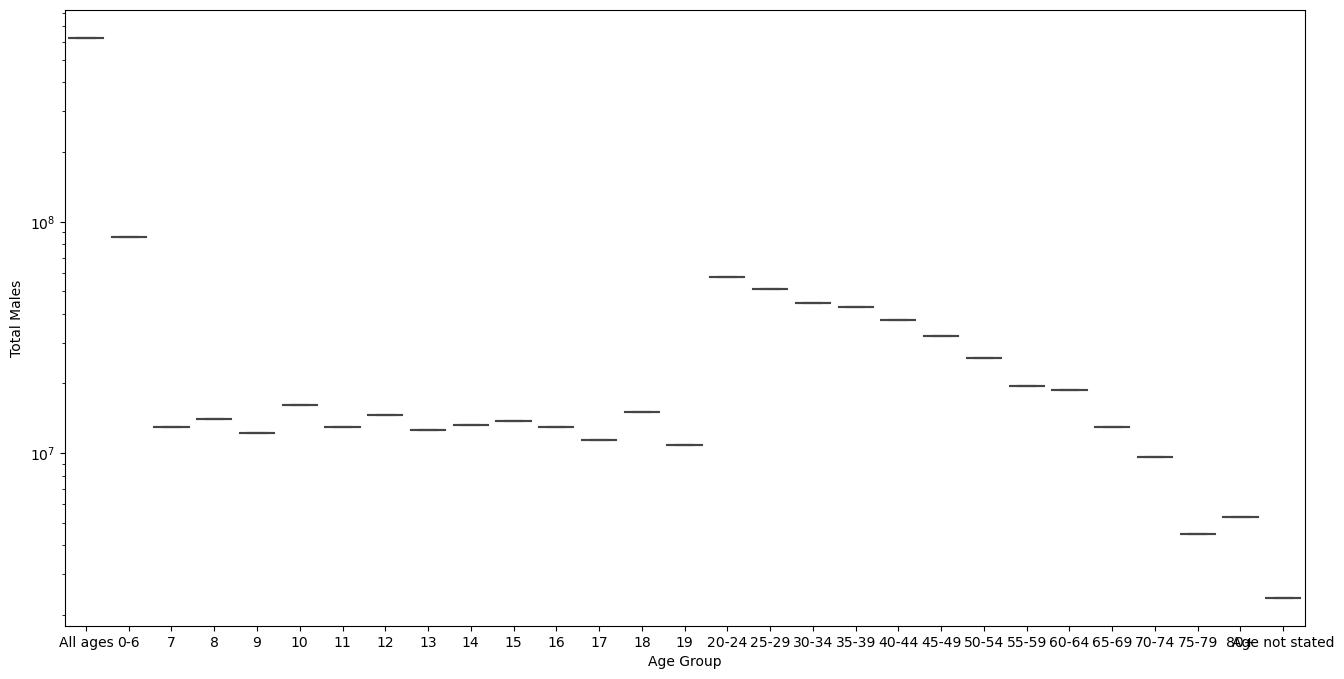

In [149]:
plt.figure(figsize=(16,8))
plt.subplot()

sns.boxplot(y='Total Males', x ='Age Group', data=edu_cens_2011_total_india_population)
plt.yscale('log')
plt.show()

In [169]:
edu_cens_2011_total_india_population.groupby('Age Group')['Total Females'].describe().sort_values(by='top', ascending=False)

,count,unique,top,freq
Age Group,,,,
All ages,1,1,587584719,1
0-6,1,1,78762999,1
20-24,1,1,53839529,1
25-29,1,1,50069757,1
30-34,1,1,43934277,1
35-39,1,1,42221303,1
40-44,1,1,34892726,1
45-49,1,1,30180213,1
50-54,1,1,23225988,1


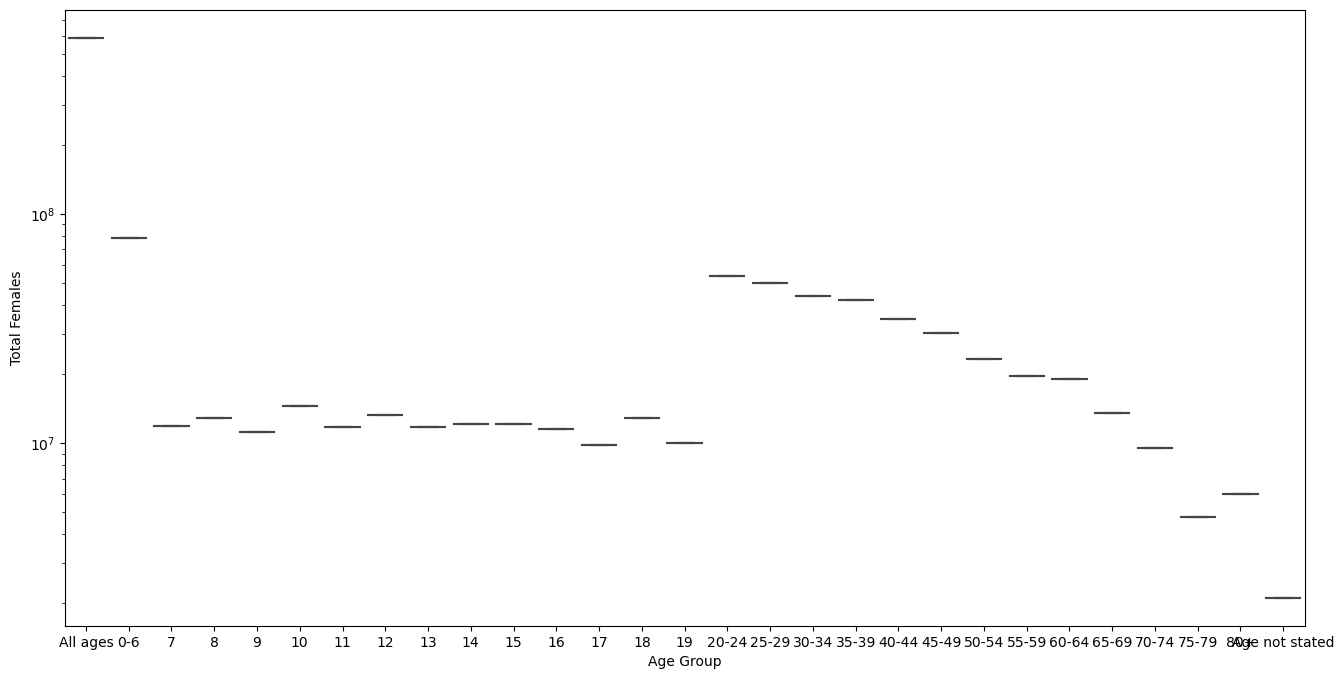

In [170]:
plt.figure(figsize=(16,8))
plt.subplot()

sns.boxplot(y='Total Females', x ='Age Group', data=edu_cens_2011_total_india_population)
plt.yscale('log')
plt.show()

D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


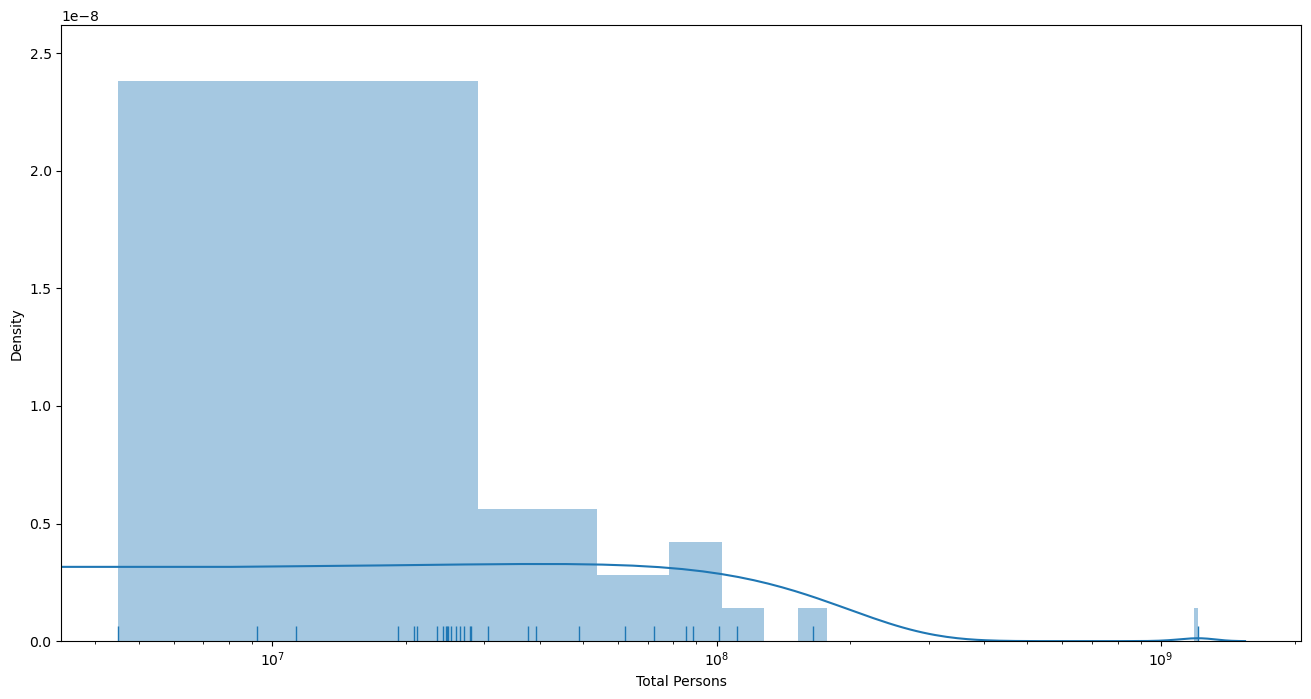

In [191]:
plt.figure(figsize=(16,8))
plt.subplot()

sns.distplot(a=edu_cens_2011_total_india_population['Total Persons'] ,rug=True)
plt.xscale('log')

plt.show()

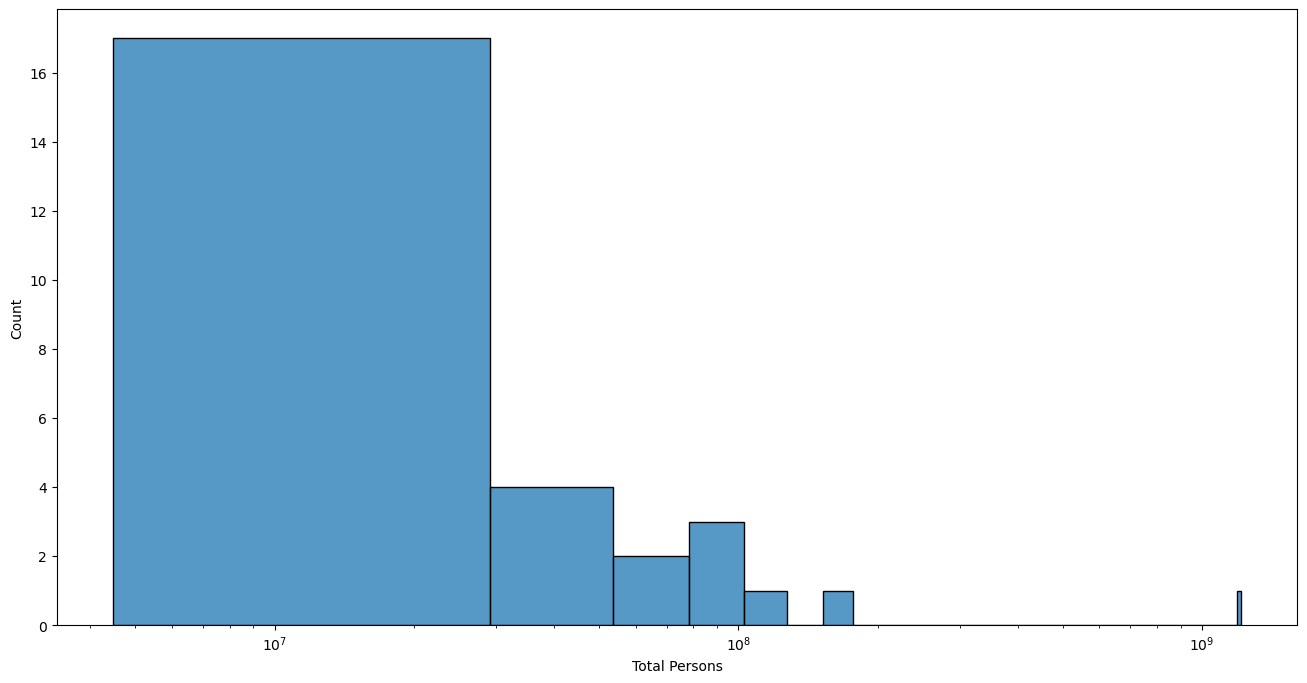

In [194]:
plt.figure(figsize=(16,8))
plt.subplot()

sns.histplot(x='Total Persons', data=edu_cens_2011_total_india_population)
plt.xscale('log')

plt.show()

In [213]:
edu_cens_2011_total_india_population['Total Persons'].value_counts()

1210854977    1
111424222     1
11289005      1
9232503       1
19208842      1
26454983      1
37663707      1
39146055      1
49069254      1
62318327      1
72438112      1
85140684      1
88594951      1
101413965     1
20859088      1
164515253     1
27958147      1
21217467      1
24592293      1
25899454      1
25258169      1
24280683      1
27877307      1
24740946      1
30552107      1
23424638      1
26968373      1
24826640      1
4489802       1
Name: Total Persons, dtype: int64

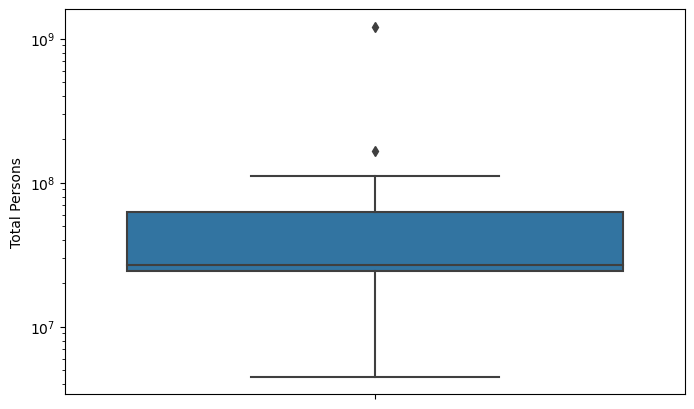

In [198]:
plt.figure(figsize=(8, 5))
plt.subplot()

sns.boxplot(y='Total Persons', data=edu_cens_2011_total_india_population)
plt.yscale('log')

plt.show()

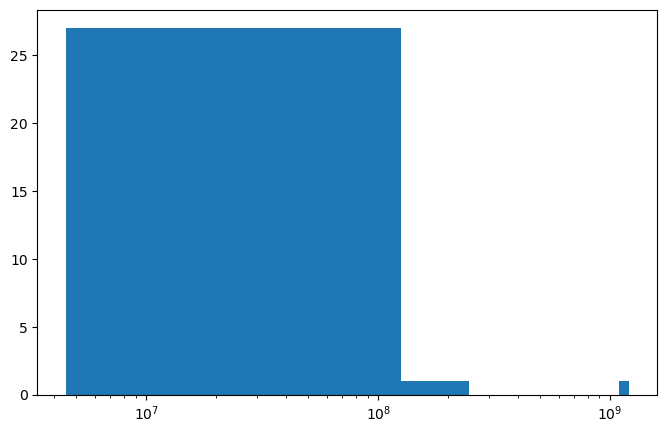

In [216]:
plt.figure(figsize=(8, 5))
plt.subplot()

plt.hist(x=edu_cens_2011_total_india_population['Total Persons'], histtype='bar')
plt.xscale('log')

plt.show()

In [217]:
edu_cens_2011_orginal

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
6,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
7,00,000,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,...,0,0,0,0,0,0,0,0,0,0
8,00,000,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,...,0,0,0,0,0,0,0,136465,75715,60750
9,00,000,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,...,0,0,0,0,0,0,0,96524,52561,43963
10,00,000,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,...,0,0,0,0,0,0,0,70452,38456,31996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,65-69,1757,953,804,586,195,...,0,21,14,7,82,72,10,4,1,3
3134,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,70-74,1193,691,502,419,140,...,4,14,9,5,56,41,15,7,4,3
3135,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,75-79,645,343,302,234,80,...,0,6,3,3,22,16,6,7,4,3
3136,35,000,State - ANDAMAN & NICOBAR ISLANDS,Urban,80+,616,287,329,264,68,...,0,2,1,1,23,14,9,6,1,5


In [218]:
edu_cens_2011_total_india_population

,State Code,District Code,Area Name,Total/Rural/Urban,Age Group,Total Persons,Total Males,Total Females,Illiterate Persons,Illiterate Males,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
6,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
7,00,000,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,...,0,0,0,0,0,0,0,0,0,0
8,00,000,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,...,0,0,0,0,0,0,0,136465,75715,60750
9,00,000,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,...,0,0,0,0,0,0,0,96524,52561,43963
10,00,000,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,...,0,0,0,0,0,0,0,70452,38456,31996
11,00,000,INDIA,Total,10,30552107,16089436,14462671,3454505,1661124,...,0,0,0,0,0,0,0,85652,47423,38229
12,00,000,INDIA,Total,11,24740946,12962604,11778342,1988473,929328,...,0,0,0,0,0,0,0,65030,35877,29153
13,00,000,INDIA,Total,12,27877307,14637892,13239415,2391529,1087320,...,0,0,0,0,0,0,0,68452,37773,30679
14,00,000,INDIA,Total,13,24280683,12563775,11716908,1810476,790923,...,0,0,0,0,0,0,0,56720,30680,26040
15,00,000,INDIA,Total,14,25258169,13165128,12093041,2100785,920460,...,0,0,0,0,0,0,0,58561,31901,26660


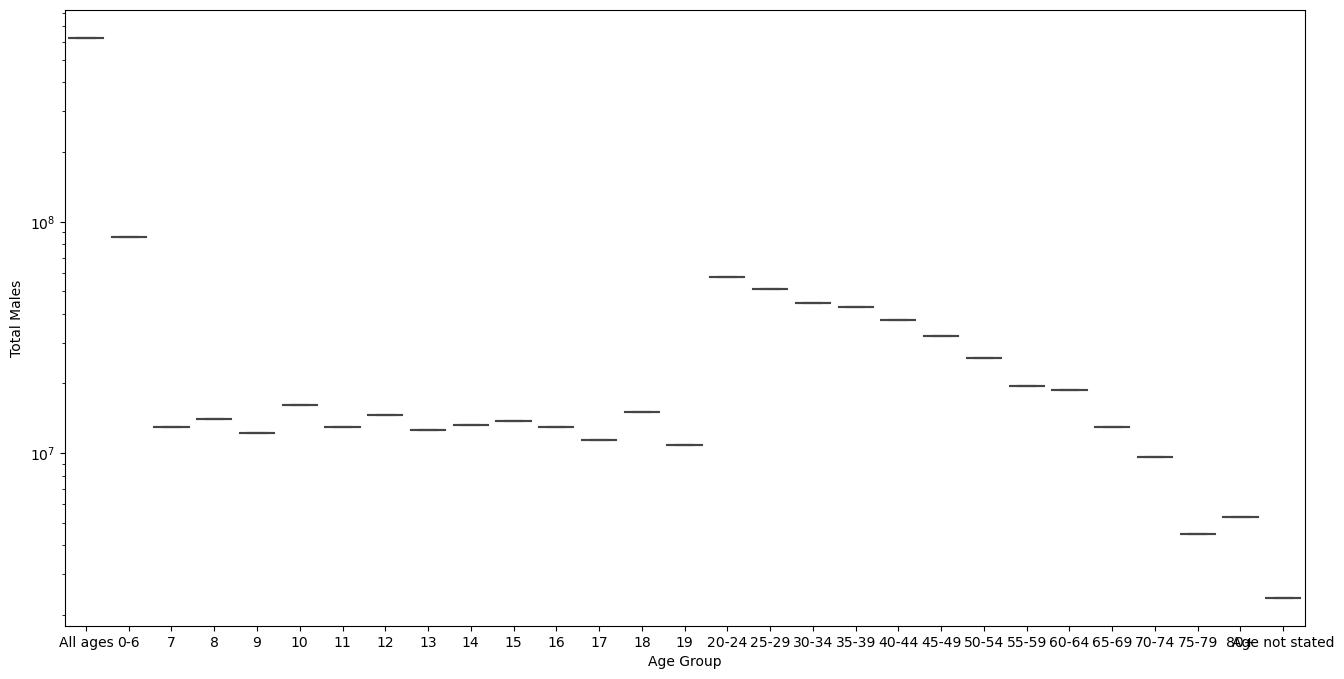

In [246]:
plt.figure(figsize=(16, 8))

sns.boxplot(x='Age Group', y='Total Males', data=edu_cens_2011_total_india_population)
plt.yscale('log')
plt.show()

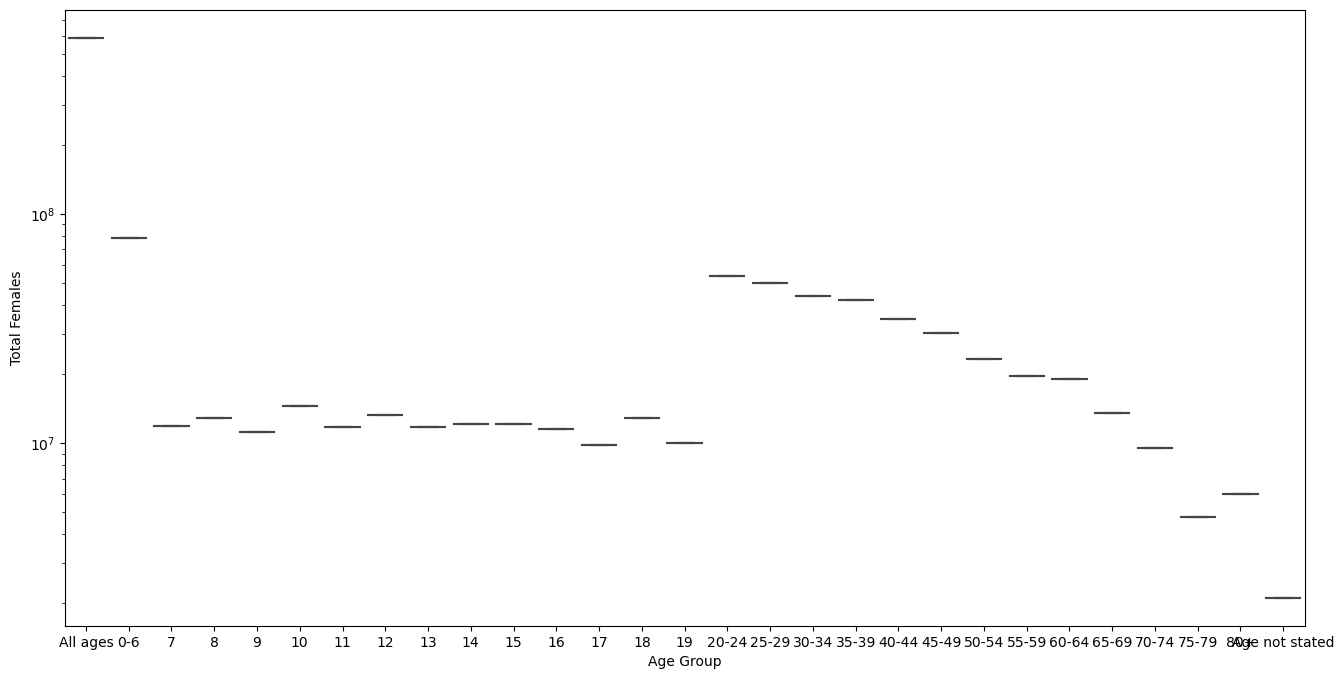

In [247]:
plt.figure(figsize=(16, 8))

sns.boxplot(x='Age Group', y='Total Females', data=edu_cens_2011_total_india_population)
plt.yscale('log')
plt.show()

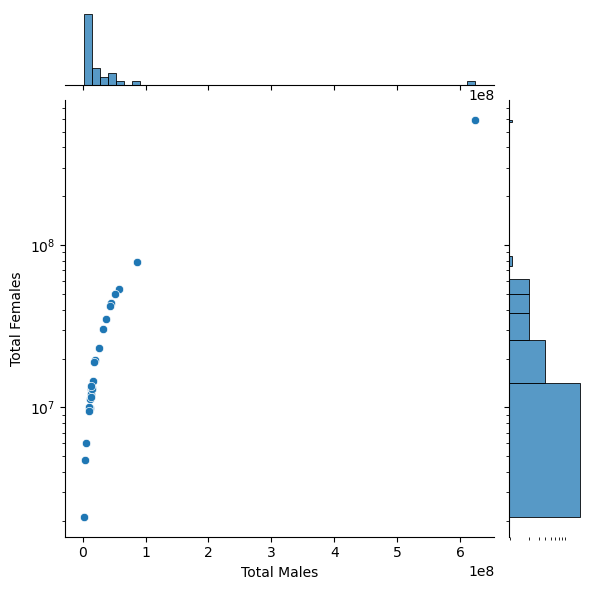

In [248]:
# Visualising Bivariate Distributions

sns.jointplot(x='Total Males', y='Total Females', data=edu_cens_2011_total_india_population)
plt.yscale('log')
plt.xscale('log')
plt.show()

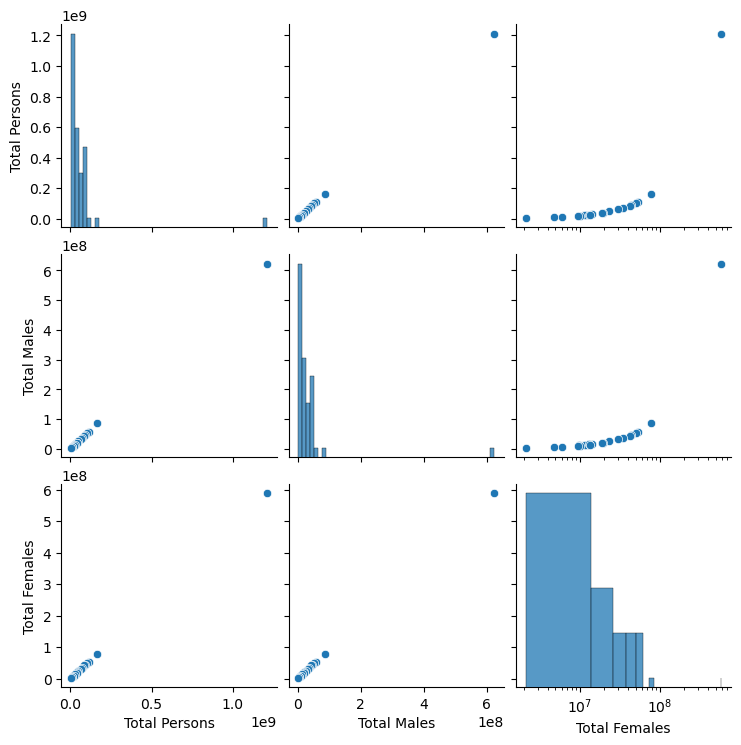

In [253]:
# Visualising Bivariate Distributions

sns.pairplot(data=edu_cens_2011_total_india_population[['Total Persons', 'Total Males', 'Total Females']])

plt.xscale('log')
plt.yscale('log')

plt.show()

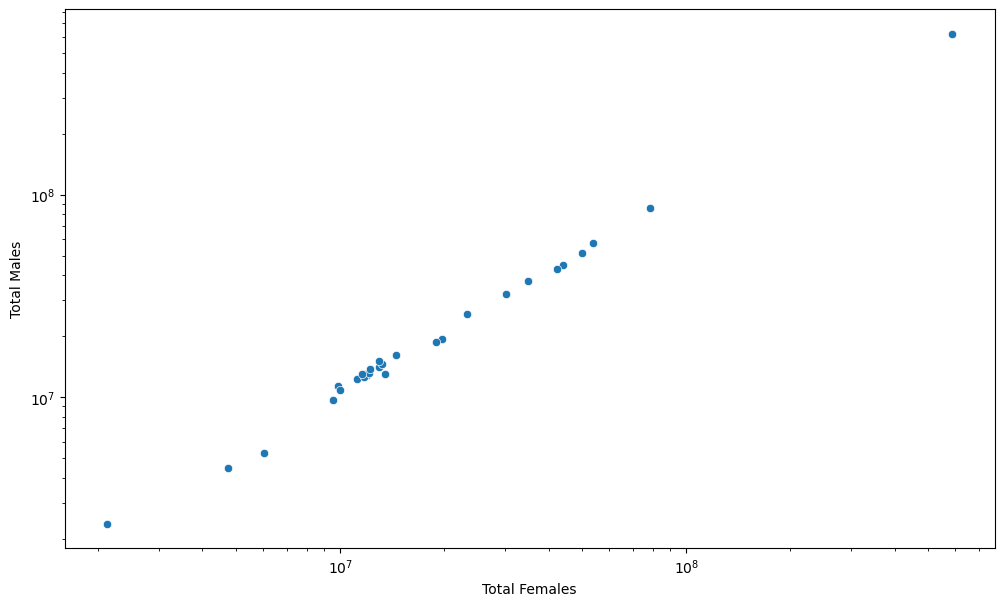

In [256]:
# Visualising Bivariate Distributions

plt.figure(figsize=(12,7))
sns.scatterplot(x= 'Total Females', y='Total Males', data=edu_cens_2011_total_india_population)

plt.xscale('log')
plt.yscale('log')

plt.show()

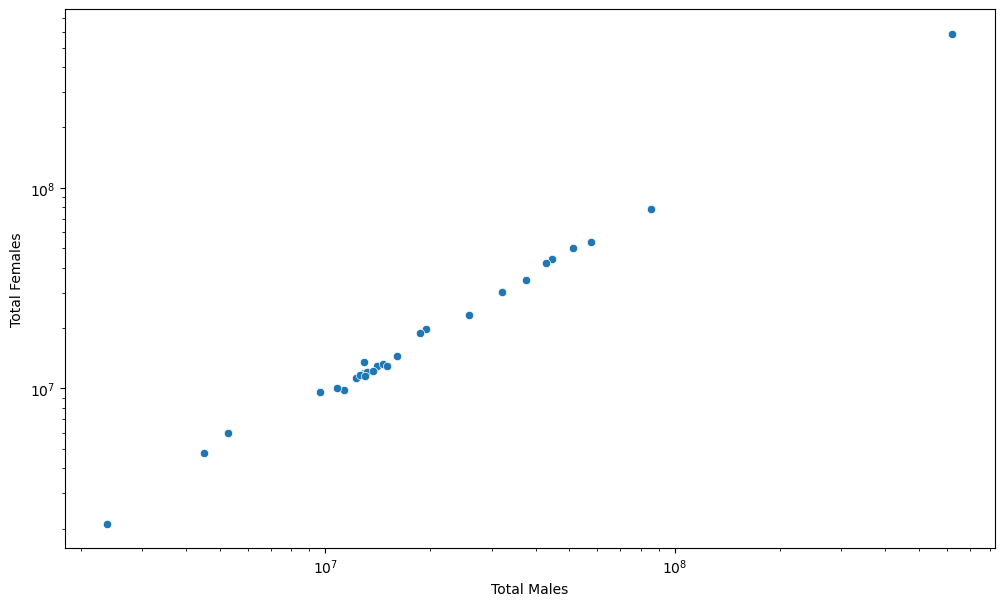

In [257]:
# Visualising Bivariate Distributions

plt.figure(figsize=(12,7))
sns.scatterplot(x= 'Total Males', y='Total Females', data=edu_cens_2011_total_india_population)

plt.xscale('log')
plt.yscale('log')

plt.show()

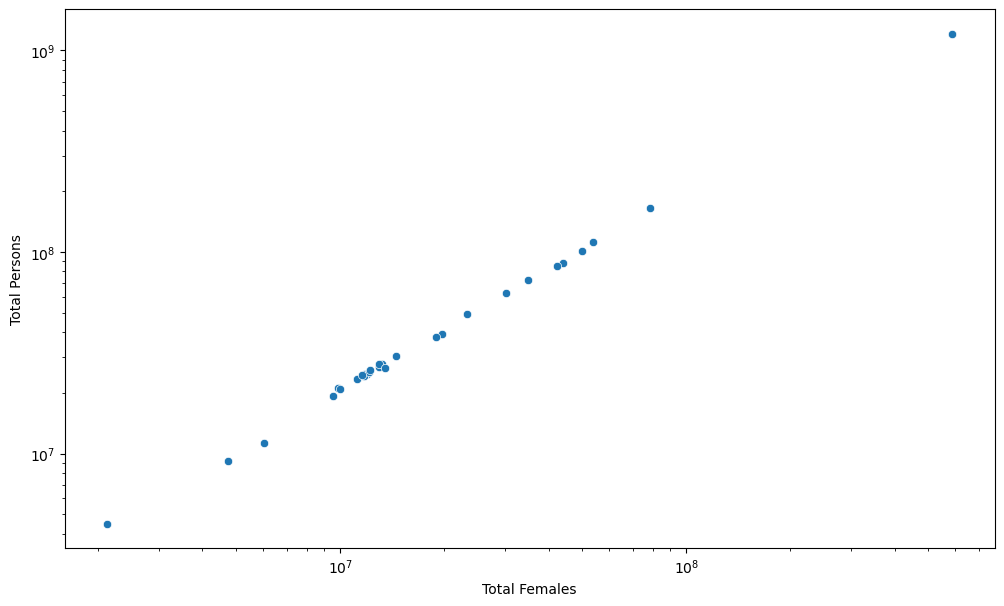

In [260]:
# Visualising Bivariate Distributions

plt.figure(figsize=(12,7))
sns.scatterplot(x= 'Total Females', y='Total Persons', data=edu_cens_2011_total_india_population)

plt.xscale('log')
plt.yscale('log')


In [263]:
cor = edu_cens_2011_total_india_population[[ 'Total Males', 'Total Females']].corr()
round(cor, 3)

""


In [267]:
pv_df = edu_cens_2011_total_india_population.pivot_table(index='Age Group', values = ['Total Persons'])
pv_df.sort_values(by='Total Persons', ascending = False)

,Total Persons
Age Group,
All ages,1.210855e+09
0-6,1.645153e+08
20-24,1.114242e+08
25-29,1.014140e+08
30-34,8.859495e+07
35-39,8.514068e+07
40-44,7.243811e+07
45-49,6.231833e+07
50-54,4.906925e+07


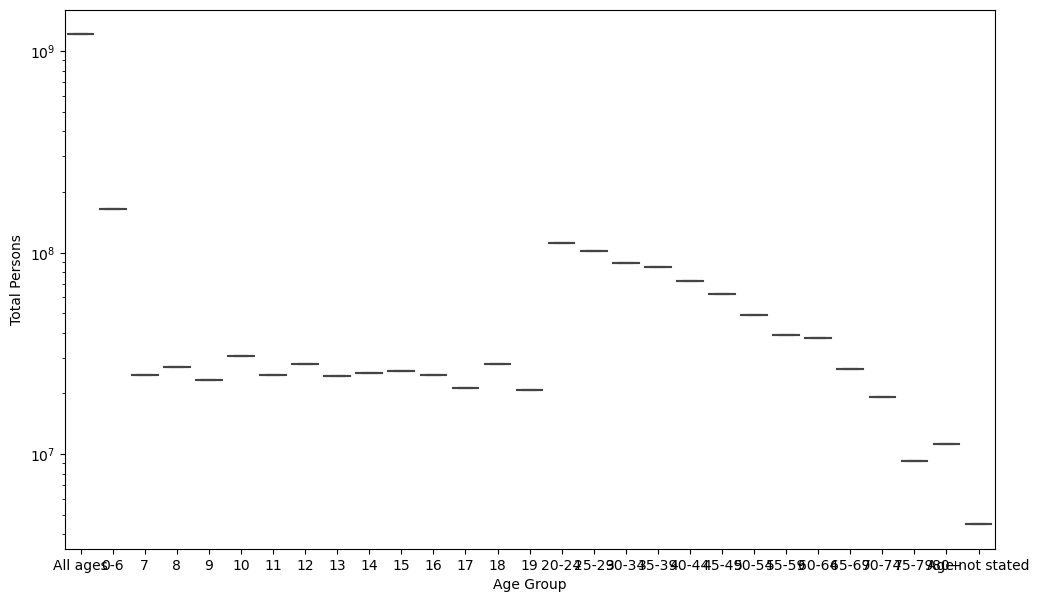

In [270]:
# boxplot of a variable across various product categories

# Visualising Bivariate Distributions

plt.figure(figsize=(12,7))
sns.boxplot(x='Age Group', y='Total Persons', data=edu_cens_2011_total_india_population)
plt.yscale('log')
plt.show()

In [271]:
edu_cens_2011_total_india_population.columns

Index(['State Code', 'District Code', 'Area Name', 'Total/Rural/Urban',
       'Age Group', 'Total Persons', 'Total Males', 'Total Females',
       'Illiterate Persons', 'Illiterate Males', 'Illiterate Females',
       'Literate Persons', 'Literate Males', 'Literate Males', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44'],
      dtype='object')

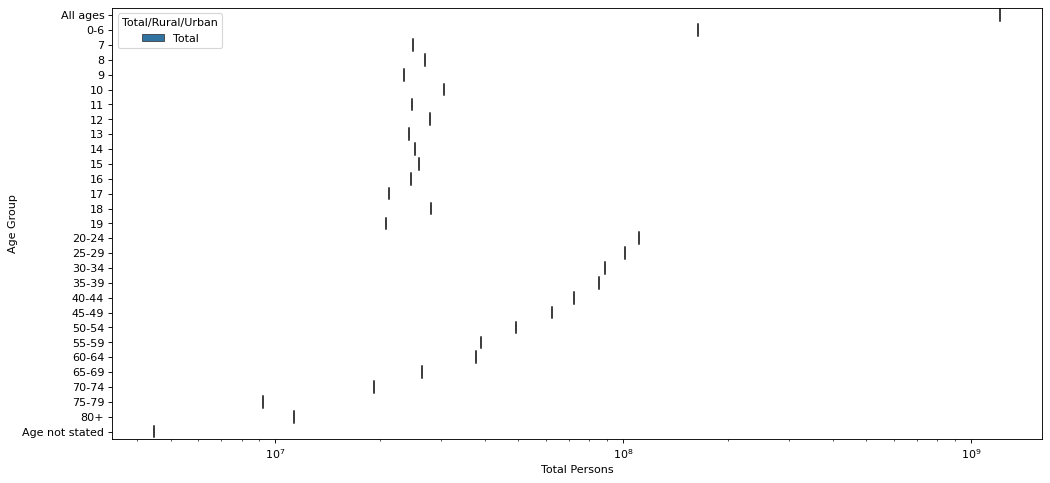

In [274]:
# set figure size for larger figure
plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.boxplot(x='Total Persons', y='Age Group', hue="Total/Rural/Urban", data=edu_cens_2011_total_india_population)
plt.xscale('log')
plt.show()